In [1]:
from scipy import stats
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rot_vec(x, theta):
    rot_mat = np.array([[np.cos(theta), -np.sin(theta)],
                        [np.sin(theta),  np.cos(theta)]])
    return  np.dot(rot_mat, x)

In [22]:
np.random.seed(0)
MU = np.array([0, -0])
SIGMA0 = np.array([[1, -2], [-2, 6]])
SIGMA0_x0 = SIGMA0[1,1]-SIGMA0[0,1]**2/SIGMA0[0,0]
SIGMA0_y0 = SIGMA0[0,0]-SIGMA0[0,1]**2/SIGMA0[1,1]
R = 8
XX = np.linspace(-R, R, 200)
YY = np.linspace(-R, R, 200)
X0, Y0 = stats.multivariate_normal(MU, SIGMA0).rvs(size=1000).T
X1 = X0 / np.sqrt(SIGMA0_y0)
Y1 = Y0 / np.sqrt(SIGMA0_x0)

SIGMA1 = np.zeros((2,2))
SIGMA1[0, 0] = SIGMA0[0, 0] / SIGMA0_y0
SIGMA1[1, 1] = SIGMA0[1, 1] / SIGMA0_x0
SIGMA1[0, 1] = SIGMA0[0, 1] / np.sqrt(SIGMA0_x0 * SIGMA0_y0)
SIGMA1[1, 0] = SIGMA0[1, 0] / np.sqrt(SIGMA0_x0 * SIGMA0_y0)
ALPHA1_green = (6 / np.sqrt(SIGMA0_x0)) / (- 3 / np.sqrt(SIGMA0_y0))
SIGMA1_green = ((SIGMA1[0, 0] + (ALPHA1_green ** 2) * SIGMA1[1, 1] + 2 * ALPHA1_green * SIGMA1[1, 0])) / (ALPHA1_green ** 2 + 1)

SIGMA2 = np.array([[1, 0], [0, 1]])
X2 = []
Y2 = []
for x0, y0 in zip(X0, Y0):
    z = np.dot(linalg.sqrtm(np.linalg.inv(SIGMA0)), np.array([x0, y0]))
    X2.append(z[0])
    Y2.append(z[1])
X2 = np.array(X2)
Y2 = np.array(Y2)

lam, w = np.linalg.eig(SIGMA0)
THETA2 = np.arccos(w[0, 0])
LAM2 = np.array([[1 / np.sqrt(lam[0]), 0], [0, 1 / np.sqrt(lam[1])]])

POINT21_red = rot_vec(np.array([3, 0]), THETA2)
POINT21_blue = rot_vec(np.array([0, 3]), THETA2)
POINT21_green = rot_vec(np.array([-3, 6]), THETA2)
POINT22_red = POINT21_red * np.array([LAM2[0, 0], LAM2[1, 1]])
POINT22_blue = POINT21_blue * np.array([LAM2[0, 0], LAM2[1, 1]])
POINT22_green = POINT21_green * np.array([LAM2[0, 0], LAM2[1, 1]])


2.5887375530780297

In [8]:
def init_ax(ax, data=0):
    ax.set_xlim(-R, R)
    ax.set_ylim(-R, R)
    if data == 0:
        ax.set_xlabel("x", size = 14, weight = "light")
        ax.set_ylabel("y", size = 14, weight = "light")
    elif data == 1:
        ax.set_xlabel("x/0.58", size = 14, weight = "light")
        ax.set_ylabel("y/1.41", size = 14, weight = "light")
    elif data ==21:
        ax.set_xlabel("x_", size = 14, weight = "light")
        ax.set_ylabel("y_ ", size = 14, weight = "light")
    elif data ==22:
        ax.set_xlabel("x__", size = 14, weight = "light")
        ax.set_ylabel("y__", size = 14, weight = "light")
    ax.set_xticks(np.arange(-R, R, 1))
    ax.set_yticks(np.arange(-R, R, 1))

def add_sub_line(ax, xs, ys):
    for x in xs:
        ax.vlines(x=x, ymin=-R, ymax=R, linewidths=0.5, ls='--', color="black")
    for y in ys:
        ax.hlines(y=y, xmin=-R, xmax=R, linewidths=0.5, ls='--', color="black")

def add_contour(ax, data=0):
    linewidths=1.5
    zorder = 2
    x, y = np.meshgrid(XX, YY)
    if data == 0:
        z = stats.multivariate_normal(MU, SIGMA0).pdf(np.dstack((x, y)))
    elif data == 1:
        z = stats.multivariate_normal(MU, SIGMA1).pdf(np.dstack((x, y)))
    elif data == 2:
        z = stats.multivariate_normal(MU, SIGMA2).pdf(np.dstack((x, y)))
    elif data == 21:
        z = stats.multivariate_normal(MU, SIGMA0).pdf(np.dstack((x, y)))
        xx = np.zeros([200, 200])
        yy = np.zeros([200, 200])
        for i in range(200):
            for j in range(200):
                xx[i, j], yy[i, j] = rot_vec(np.array([x[i, j], y[i, j]]), THETA2)
        ax.contour(xx, yy, z, colors=['lightblue'], linewidths=linewidths, levels=np.arange(0.001, z.max(), 0.02), zorder=zorder)
        return
    ax.contour(x, y, z, colors=['lightblue'], linewidths=linewidths, levels=np.arange(0.001, z.max(), 0.02), zorder=zorder)
    
    
def add_scatter(ax, data=0):
    color = "black"
    zorder = 1
    if data == 0:
        ax.scatter(X0, Y0, s=1.5, color=color, zorder=zorder)
    elif data == 1:
        ax.scatter(X1, Y1, s=1.5, color=color, zorder=zorder)
    elif data == 2:
        ax.scatter(X2, Y2, s=1.5, color=color, zorder=zorder)
    elif data == 21:
        zz = [rot_vec(np.array([x, y]), THETA2) for x, y in zip(X0, Y0)]
        xx = [i[0] for i in zz]
        yy = [i[1] for i in zz]
        ax.scatter(xx, yy, s=1.5, color=color, zorder=zorder)
        
        
def add_norm1d(ax, color, data=0):
    linewidth = 2
    zorder = 6
    if data == 0:
        if color == "red":
            ax.plot(XX, 10 * stats.norm.pdf(XX, 0, np.sqrt(SIGMA0_y0)), color=color, linewidth=linewidth, zorder=zorder)
            print(np.sqrt(SIGMA0_y0))
        if color == "blue":
            ax.plot(10 * stats.norm.pdf(YY, 0, np.sqrt(SIGMA0_x0)), YY, color=color, linewidth=linewidth, zorder=zorder)
            print(np.sqrt(SIGMA0_x0))
    elif data == 1:
        if color == "red":
            ax.plot(XX, 10 * stats.norm.pdf(XX, 0, 1), color=color, linewidth=linewidth, zorder=zorder)
        if color == "blue":
            ax.plot(10 * stats.norm.pdf(YY, 0, 1), YY, color=color, linewidth=linewidth, zorder=zorder)
        elif color == "green":
            xx = 10 * stats.norm.pdf(XX * 2, 0, np.sqrt(SIGMA1_green))
            zz = [rot_vec(np.array([x, y]),  np.arctan2(ALPHA1_green, 1)) for x, y in zip(XX * 2, xx)]
            xx = [i[0] for i in zz]
            yy = [i[1] for i in zz]
            print(np.sqrt(SIGMA1_green))
            ax.plot(xx, yy, color=color, linewidth=linewidth, zorder=zorder)
    elif data==2:
        xx = 10 * stats.norm.pdf(XX * 2, 0, 1)
        if color == "red":
            point = POINT22_red
        elif color == "blue":
            point = POINT22_blue
        elif color == "green":
            point = POINT22_green
        zz = [rot_vec(np.array([x, y]),  np.arctan2(point[1], point[0])) for x, y in zip(XX * 2, xx)]
        xx = [i[0] for i in zz]
        yy = [i[1] for i in zz]
        ax.plot(xx, yy, color=color, linewidth=linewidth, zorder=zorder)


def add_norm1d_point(ax, color, data=0):
    s = 5
    zorder = 5
    if data == 0:
        if color == "red":
            hit = np.logical_and(- 0.5 < Y0 , Y0 < 0.5)
        elif color == "blue":
            hit = np.logical_and(- 0.3 < X0 , X0 < 0.3)
        ax.scatter(X0[hit], Y0[hit], s=s, color=color, zorder=zorder)
    elif data == 1:
        if color == "red":
            hit = np.logical_and(- 0.4 < Y1 , Y1 < 0.4)
        elif color == "blue":
            hit = np.logical_and(- 0.4 < X1 , X1 < 0.4)
        elif color == "green":
            hit = np.logical_and(ALPHA1_green * X1 - 0.4< Y1 , Y1 < ALPHA1_green * X1 + 0.4)
        ax.scatter(X1[hit], Y1[hit], s=s, color=color, zorder=zorder)
    elif data == 2:
        if color == "red":
            alpha = POINT22_red[1] / POINT22_red[0]
            hit = np.logical_and(alpha * X2 - 0.4< Y2 , Y2 < alpha * X2 + 0.4)
        elif color == "blue":
            alpha = POINT22_blue[1] / POINT22_blue[0]
            hit = np.logical_and(alpha * X2 - 0.4< Y2 , Y2 < alpha * X2 + 0.4)
        elif color == "green":
            alpha = POINT22_green[1] / POINT22_green[0]
            hit = np.logical_and(alpha * X2 - 0.7< Y2 , Y2 < alpha * X2 + 0.7)
        ax.scatter(X2[hit], Y2[hit], s=s, color=color, zorder=zorder)
            

In [9]:
x, y = np.meshgrid(XX, YY)
np.dstack((x, y)).shape

(200, 200, 2)

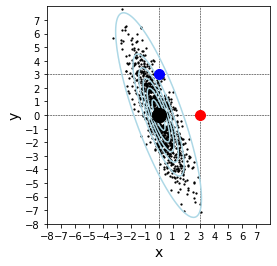

In [10]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
init_ax(ax)
add_sub_line(ax, [0, 3], [0, 3])
add_scatter(ax)
add_contour(ax)
ax.scatter(3, 0, s=100, color='red', zorder=2)
ax.scatter(0, 3, s=100, color='blue', zorder=3)
ax.scatter(0, 0, s=200, color='black', zorder=4)
plt.show()

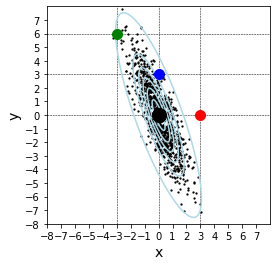

In [11]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
init_ax(ax)
add_sub_line(ax, [0, 3, - 3], [0, 3, 6])
add_scatter(ax)
add_contour(ax)
ax.scatter(3, 0, s=100, color='red', zorder=2)
ax.scatter(0, 3, s=100, color='blue', zorder=3)
ax.scatter(-3, 6, s=100, color='green', zorder=3)
ax.scatter(0, 0, s=200, color='black', zorder=4)
plt.show()

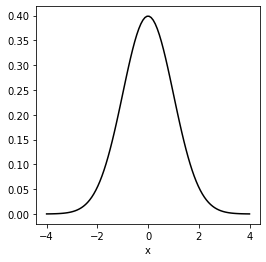

In [12]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
xx = np.linspace(-4, 4, 100)
ax.plot(xx, stats.norm.pdf(xx, 0, 1), color='black')
ax.set_xlabel('x')
plt.show()

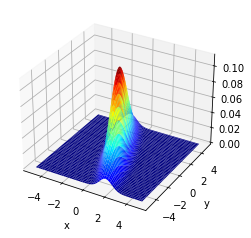

In [13]:
r = 5
x1, x2 = np.meshgrid(np.linspace(-r,r,100), np.linspace(-r,r,100))
x = np.c_[np.ravel(x1), np.ravel(x2)]

y = stats.multivariate_normal.pdf(x=x, mean=MU, cov=SIGMA0)
y = y.reshape(x1.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.plot_surface(x1, x2, y, cmap='jet', linewidth=0)
plt.show()


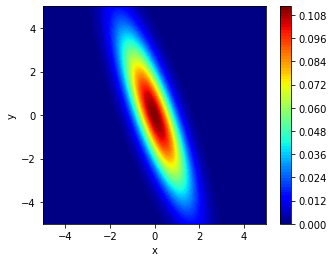

In [14]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1)
r = 5
x1, x2 = np.meshgrid(np.linspace(-r,r,100), np.linspace(-r,r,100))
x = np.c_[np.ravel(x1), np.ravel(x2)]
y = stats.multivariate_normal.pdf(x=x, mean=MU, cov=SIGMA0)
y = y.reshape(x1.shape)
ax.set_xlabel("x")
ax.set_ylabel("y")
c = ax.contourf(x1, x2, y, levels=100, cmap="jet")
fig.colorbar(c)
plt.show()

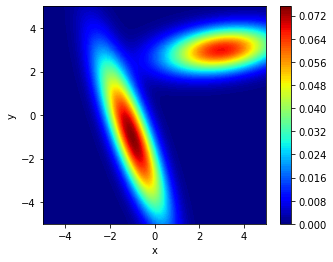

In [15]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1)
x1, x2 = np.meshgrid(np.linspace(-r,r,100), np.linspace(-r,r,100))
x = np.c_[np.ravel(x1), np.ravel(x2)]
sig_temp = np.zeros([2,2])
sig_temp[0,0]=SIGMA0[1,1] / 2
sig_temp[1,1]=SIGMA0[0,0] / 2
sig_temp[0,1] = 1/3
sig_temp[1,0] = 1/3
y = 2/3 * stats.multivariate_normal.pdf(x=x, mean=MU-1, cov=SIGMA0) + 1/2*stats.multivariate_normal.pdf(x=x, mean=MU + 3, cov=sig_temp)
y = y.reshape(x1.shape)
ax.set_xlabel("x")
ax.set_ylabel("y")
c = ax.contourf(x1, x2, y, levels=100, cmap="jet")
fig.colorbar(c)
plt.show()

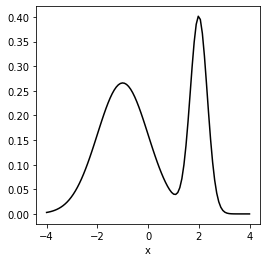

In [16]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
xx = np.linspace(-4, 4, 100)
ax.plot(xx, 2/3 * stats.norm.pdf(xx, -1, 1) + 1/3  * stats.norm.pdf(xx, 2, 1/3) , color='black')
ax.set_xlabel('x')
plt.show()

0.5773502691896258
1.4142135623730951


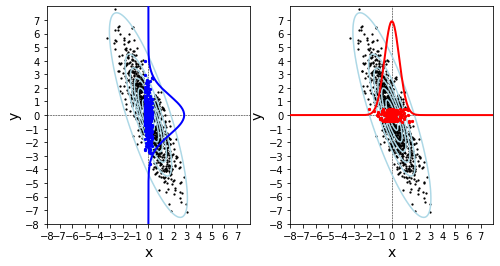

In [17]:
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(1,2,2)
init_ax(ax)
add_sub_line(ax, [0], [0])
add_contour(ax)
add_scatter(ax)
add_norm1d(ax, "red")
add_norm1d_point(ax, "red")

ax = fig.add_subplot(1,2,1)
init_ax(ax)
add_sub_line(ax, [0], [0])
add_contour(ax)
add_scatter(ax)
add_norm1d(ax, "blue")
add_norm1d_point(ax, "blue")

plt.show()

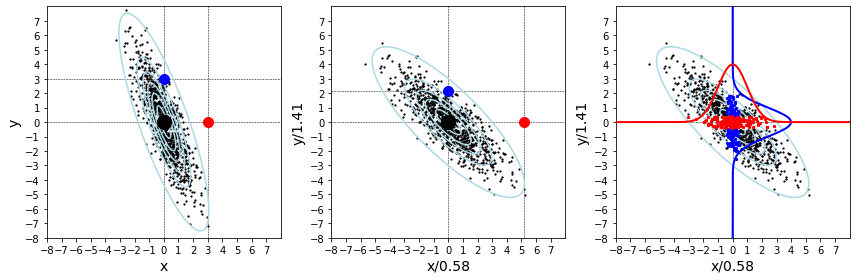

In [18]:
fig = plt.figure(figsize=(12, 4), tight_layout=True)

ax = fig.add_subplot(1,3,1)
init_ax(ax)
add_sub_line(ax,[0, 3], [0, 3])
add_scatter(ax)
add_contour(ax)
ax.scatter(3, 0, s=100, color='red', zorder=2)
ax.scatter(0, 3, s=100, color='blue', zorder=3)
ax.scatter(0, 0, s=200, color='black', zorder=4)

ax = fig.add_subplot(1,3,2)
init_ax(ax)
init_ax(ax, data=1)
add_sub_line(ax,[0, 3/np.sqrt(SIGMA0_y0)], [0, 3/np.sqrt(SIGMA0_x0)])
add_scatter(ax, data=1)
add_contour(ax, data=1)
ax.scatter(3/np.sqrt(SIGMA0_y0), 0, s=100, color='red', zorder=2)
ax.scatter(0, 3/np.sqrt(SIGMA0_x0), s=100, color='blue', zorder=3)
ax.scatter(0, 0, s=200, color='black', zorder=4)

ax = fig.add_subplot(1,3,3)
init_ax(ax, data=1)
add_sub_line(ax,[0], [0])
add_contour(ax, data=1)
add_scatter(ax, data=1)

add_norm1d(ax, "blue", data=1)
add_norm1d(ax, "red", data=1)
add_norm1d_point(ax, "blue", data=1)
add_norm1d_point(ax, "red", data=1)

plt.show()

2.32379000772445


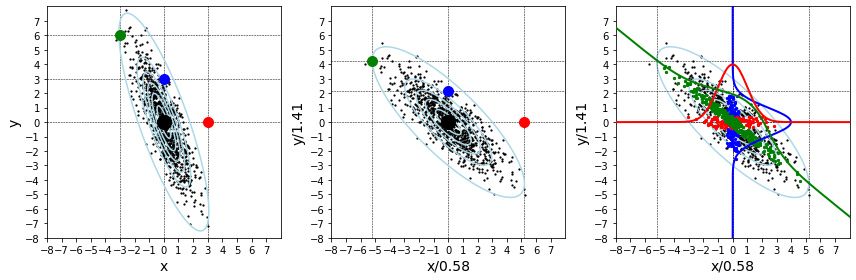

In [19]:
fig = plt.figure(figsize=(12, 4), tight_layout=True)

ax = fig.add_subplot(1,3,1)
init_ax(ax)
add_sub_line(ax, [0, 3, - 3], [0, 3, 6])
add_scatter(ax)
add_contour(ax)
ax.scatter(3, 0, s=100, color='red', zorder=2)
ax.scatter(0, 3, s=100, color='blue', zorder=3)
ax.scatter(-3, 6, s=100, color='green', zorder=3)
ax.scatter(0, 0, s=200, color='black', zorder=4)

ax = fig.add_subplot(1,3,2)
init_ax(ax)
init_ax(ax, data=1)
add_sub_line(ax,[0, 3/np.sqrt(SIGMA0_y0), -3/np.sqrt(SIGMA0_y0)], [0, 3/np.sqrt(SIGMA0_x0), 6/np.sqrt(SIGMA0_x0)])
add_scatter(ax, data=1)
add_contour(ax, data=1)
ax.scatter(3/np.sqrt(SIGMA0_y0), 0, s=100, color='red', zorder=2)
ax.scatter(0, 3/np.sqrt(SIGMA0_x0), s=100, color='blue', zorder=3)
ax.scatter(-3/np.sqrt(SIGMA0_y0), 6/np.sqrt(SIGMA0_x0), s=100, color='green', zorder=3)
ax.scatter(0, 0, s=200, color='black', zorder=4)


ax = fig.add_subplot(1,3,3)
init_ax(ax, data=1)
add_sub_line(ax, [0], [0])
add_contour(ax, data=1)
add_scatter(ax, data=1)
add_sub_line(ax,[0, 3/np.sqrt(SIGMA0_y0), -3/np.sqrt(SIGMA0_y0)], [0, 3/np.sqrt(SIGMA0_x0), 6/np.sqrt(SIGMA0_x0)])
add_norm1d(ax, "blue", data=1)
add_norm1d(ax, "red", data=1)
add_norm1d(ax, "green", data=1)
add_norm1d_point(ax, "blue", data=1)
add_norm1d_point(ax, "red", data=1)
add_norm1d_point(ax, "green", data=1)

plt.show()

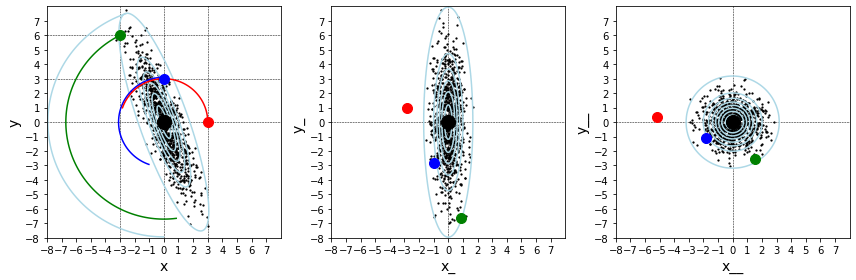

In [29]:
fig = plt.figure(figsize=(12, 4), tight_layout=True)

ax = fig.add_subplot(1,3,1)
init_ax(ax)
add_sub_line(ax, [0, 3, - 3], [0, 3, 6])
add_scatter(ax)
add_contour(ax)
ax.scatter(3, 0, s=100, color='red', zorder=2)
ax.scatter(0, 3, s=100, color='blue', zorder=3)
ax.scatter(-3, 6, s=100, color='green', zorder=3)
ax.scatter(0, 0, s=200, color='black', zorder=4)
theta = np.linspace(0,THETA2, 100)
x_green = []; y_green = []
x_blue = []; y_blue = []
x_red = []; y_red = []
x_l = []; y_l = []
for th in theta:
    z = rot_vec(np.array([-3, 6]), th)
    x_green.append(z[0])
    y_green.append(z[1])
    z = rot_vec(np.array([0, 3.1]), th)
    x_blue.append(z[0])
    y_blue.append(z[1])
    z = rot_vec(np.array([3, 0]), th)
    x_red.append(z[0])
    y_red.append(z[1])
    z = rot_vec(np.array([-2.6, 7.5]), th)
    x_l.append(z[0])
    y_l.append(z[1])
ax.plot(x_green, y_green, color='green')
ax.plot(x_blue, y_blue, color='blue')
ax.plot(x_red, y_red, color='red')
ax.plot(x_l, y_l, color='lightblue')

ax = fig.add_subplot(1,3,2)
init_ax(ax, data=21)
add_sub_line(ax, [0], [0])
add_scatter(ax, data=21)
add_contour(ax, data=21)
ax.scatter(POINT21_red[0], POINT21_red[1], s=100, color='red', zorder=2)
ax.scatter(POINT21_blue[0], POINT21_blue[1], s=100, color='blue', zorder=2)
ax.scatter(POINT21_green[0], POINT21_green[1], s=100, color='green', zorder=2)
ax.scatter(0, 0, s=200, color='black', zorder=4)

ax = fig.add_subplot(1,3,3)
init_ax(ax, data=22)
add_sub_line(ax, [0], [0])
add_scatter(ax, data=2)
add_contour(ax, data=2)
ax.scatter(POINT22_red[0], POINT22_red[1], s=100, color='red', zorder=2)
ax.scatter(POINT22_blue[0], POINT22_blue[1], s=100, color='blue', zorder=2)
ax.scatter(POINT22_green[0], POINT22_green[1], s=100, color='green', zorder=2)
ax.scatter(0, 0, s=200, color='black', zorder=4)

plt.show()

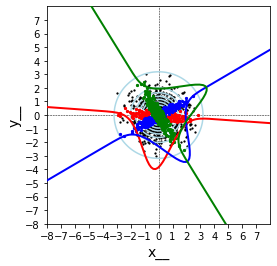

In [21]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
init_ax(ax, data=22)
add_sub_line(ax, [0], [0])
add_scatter(ax, data=2)
add_contour(ax, data=2)
add_norm1d(ax, "red", data=2)
add_norm1d(ax, "blue", data=2)
add_norm1d(ax, "green", data=2)
add_norm1d_point(ax, "red", data=2)
add_norm1d_point(ax, "blue", data=2)
add_norm1d_point(ax, "green", data=2)

plt.show()